# Query the API with a user token

In order to access the full functionality of ODA, it is recommended to authenticate to the service.
This will allow the user to receive emails at job completion and to enjoy role privileges like access to
private data or elaboration of many science windows (for collaborators of UNIGE).
Moreover, in case of unexpected issues, the developers will be able to easily track the issue and
communicate with the user.

The first step is obtaining a token.
First, you need to "Sign In" on the frontend. 
[https://frontend.staging.odahub.io/cdci/astrooda/](https://frontend.staging.odahub.io/cdci/astrooda/)

### Create account

If you do not have an account create one, by clicking always on Sign-in.

<img src="Authentication_files/Login_ODA-new.png">

### login and get API code

* Once you login, you will find the "API token" button

<img src="Authentication_files/API_token.png">

* When you click on it, you will see a window in which the token can be copied on the clipboard or sent by email.

<img src="Authentication_files/token.png">

* Copy the token string and assign it to a variable called, e.g., 'token' as done in the following cell below interactively

* Note that the Token lives only 24 hours, so it needs to be re


In [1]:
import getpass
token = getpass.getpass('Insert the token')

Insert the token········


## Let's get some logging

In [2]:
import logging
#default
#logging.getLogger().setLevel(logging.WARNING)
#slightly more verbose
logging.getLogger().setLevel(logging.INFO)
#all messages
#logging.getLogger().setLevel(logging.DEBUG)

logging.getLogger('oda_api').addHandler(logging.StreamHandler()) 

## Perform a query through API

You can make the query that you made through the web interface from the API

Copy the API code in a cell (remove the coockie parameter if present).

Here, we have put the token value in a variable called token in a cell above.

In [3]:
from oda_api.api import DispatcherAPI

disp = DispatcherAPI(url='http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data')
par_dict = {'src_name': '4U 1700-377', 
            'RA': '257.815417', 
            'DEC': '-41.593417', 
            'T1': '58195.455', 
            'T2': '58195.555', 
            'T_format': 'mjd', 
            'instrument': 'spi_acs', 
            'product_type': 'Real', 
            'product': 'spi_acs_lc', 
            'time_bin': '1', 
            'user_catalog_file': None,
           'token': token}

data_collection = disp.get_product(**par_dict)

unable to dig list, instance not a dict by <class 'NoneType'>; object was None
/home/ferrigno/.venv/myVE/lib/python3.8/site-packages/oda_api/api.py:801: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', None, 'selected_catalog', 'time_bin']
this will throw an error in a future version 
and might breack the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)
/home/ferrigno/.venv/myVE/lib/python3.8/site-packages/oda_api/api.py:801: UserWarning: 
----------------------------------------------------------------------------
the parameter: user_catalog_file   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', None, 'selected_catalog', 'time_bin']
this will throw an error in a future version 
and might breack the current request!
 -----------------------------------------

## Show data and plot

In [4]:
data_collection.show()

ID=0 prod_name=spi_acs_lc_0_query  meta_data: {'src_name': 'query', 'time_bin': 1.0, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}



In [5]:
lc=data_collection._p_list[0]

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


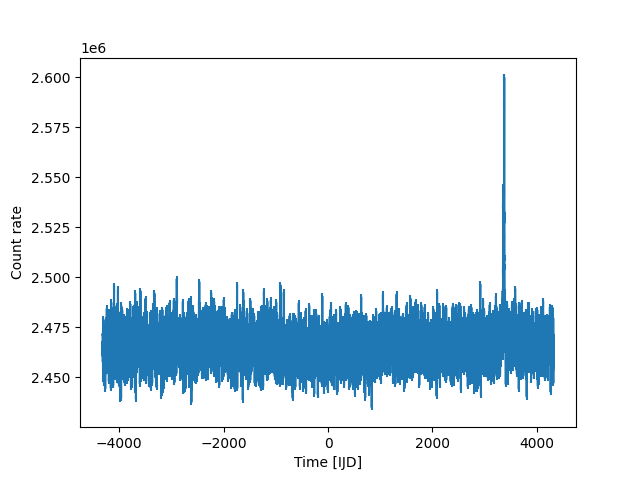

Text(0, 0.5, 'Count rate')

In [7]:
plt.errorbar(lc.data_unit[1].data['TIME'], lc.data_unit[1].data['RATE'], yerr=lc.data_unit[1].data['ERROR'])
plt.xlabel('Time [IJD]')
plt.ylabel('Count rate')

## Make another query

First look at the keys

In [8]:
descr = disp.get_product_description(instrument='isgri',product_name='isgri_spectrum')

--------------
parameters for product isgri_spectrum and instrument isgri
unable to dig list, instance not a dict by <class 'list'>; object was [{'query_name': 'src_query'}, {'name': 'src_name', 'units': 'str', 'value': 'test'}, {'name': 'RA', 'units': 'deg', 'value': 0.0}, {'name': 'DEC', 'units': 'deg', 'value': 0.0}, {'name': 'T1', 'units': None, 'value': '2001-12-11T00:00:00.000'}, {'name': 'T2', 'units': None, 'value': '2001-12-11T00:00:00.000'}, {'name': 'token', 'units': 'str', 'value': None}]

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: token,  value: None,  units: str, 
unable to dig list, instance not a dict by <class 'list'>; object was [{'query_name': 'isgri_parameters'}, {'name': 'user_catalog', 'units': 'str', 'value': None}, {'name': '

### Extract an image on a limited number of pointigs
with the parameter max_pointings, we can get a random subset of available pointings
The most common use case is an image from which we want to derive the 
catalog of bright sources in the field of view

Note that we are giving the parameters as arguments.

In [9]:
image = disp.get_product(instrument="isgri", 
                     product="isgri_image", 
                     product_type="Real", 
                     osa_version='OSA11.0',
                     radius = 8,
                     RA=275.09142677,
                     DEC=7.18535523,
                     T1=58193.455,
                     T2=58246.892,
                     T_format= 'mjd',
                     max_pointings=10,
                     E1_keV=30.0,
                     E2_keV=80.0,
                     token=token
          )

/home/ferrigno/.venv/myVE/lib/python3.8/site-packages/oda_api/api.py:801: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'detection_threshold', 'image_scale_min', 'image_scale_max']
this will throw an error in a future version 
and might breack the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2021-05-27 10:59:26), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
job: WKZ8SMLOWBJK6E2K session eccf4011778bd97f

... query status prepared => done
query COMPLETED SUCCESSFULLY (state done)
query complete: terminating


In [10]:
#Let's look at the image
image.show()

ID=0 prod_name=mosaic_image_0_mosaic  meta_data: {'product': 'mosaic', 'instrument': 'isgri', 'src_name': '', 'query_parameters': '[{"query_name": "isgri_image_query"}, {"product_name": "isgri_image_query"}, {"name": "detection_threshold", "units": "sigma", "value": 0.0}, {"name": "image_scale_min", "units": None, "value": None}, {"name": "image_scale_max", "units": None, "value": None}]'}

ID=1 prod_name=dispatcher_catalog_1  meta_data: 



In [11]:
#access it as an attribute
image.mosaic_image_0_mosaic

In [12]:
#Access it as liste memebr
data_collection._p_list[0]

In [13]:
#Minimum detection threshold and avoid including new sources
det_sigma = 8
include_new_sources = False

sources = image.dispatcher_catalog_1.table[image.dispatcher_catalog_1.table['significance'] >= det_sigma]

if len(sources) == 0:
    print('No sources in the catalog with det_sigma > %.1f' % det_sigma)
    

if not include_new_sources:
    ind = [not 'NEW' in ss for ss in sources['src_names']]
    clean_sources = sources[ind]
else:
    clean_sources = sources

#We copy back clean sources in the image data products
image.dispatcher_catalog_1.table = clean_sources

#We derive the catalog string for the spectrum !
api_cat_str=image.dispatcher_catalog_1.get_api_dictionary()

api_cat_str

'{"cat_frame": "fk5", "cat_coord_units": "deg", "cat_column_list": [[17, 87], ["GRS 1915+105", "MAXI J1820+070"], [29.396455764770508, 1803.1607666015625], [288.799560546875, 275.0911865234375], [10.939922332763672, 7.185144901275635], [-32768, -32768], [2, 2], [0, 0], [0.0002800000074785203, 0.00041666667675599456]], "cat_column_names": ["meta_ID", "src_names", "significance", "ra", "dec", "NEW_SOURCE", "ISGRI_FLAG", "FLAG", "ERR_RAD"], "cat_column_descr": [["meta_ID", "<i8"], ["src_names", "<U20"], ["significance", "<f8"], ["ra", "<f8"], ["dec", "<f8"], ["NEW_SOURCE", "<i8"], ["ISGRI_FLAG", "<i8"], ["FLAG", "<i8"], ["ERR_RAD", "|O"]], "cat_lat_name": "dec", "cat_lon_name": "ra"}'

### Query a spectrum with the maximum number of available science windows

The maximum number of science windows that can be processed in a single query is 500, 
you should specify this in max_pointings. Otherwise the default value of 50 will be used.

Once the query is submitted, you will receive an email. You can now interrupt your query and wait for a second email when data will be ready.

In [14]:
#We get a spectrum from 50 pointings, note that maximum is 500 !
spectrum = disp.get_product(instrument="isgri", 
                 product="isgri_spectrum", 
                 product_type="Real", 
                 osa_version='OSA11.0',
                     RA=275.09142677,
                         DEC=7.18535523,
                    radius = 8,
                     T1=58193.455,
                         T2=58246.892,
                         T_format= 'mjd',
                     max_pointings=50,
                     token=token,
                 selected_catalog=api_cat_str)

/home/ferrigno/.venv/myVE/lib/python3.8/site-packages/oda_api/api.py:801: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV']
this will throw an error in a future version 
and might breack the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2021-05-27 10:59:46), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
switching to POST request due to large payload: 1571 > 1000
switching to POST request due to large payload: 1571 > 1000
job: WKZ8SMLOWBJK6E2K session 74dcde680b435d93

... query status prepared => done
query COMPLETED SUCCESSFULLY (state done)
query complete: terminating


In [15]:
#This is the source we inspect the spectrum for
src_name='MAXI J1820+070'

In [16]:
#We select a particulr source
data_sel=spectrum.new_from_metadata('src_name',src_name)
data_sel.show()

ID=0 prod_name=prod_0_MAXIJ1820+070_isgri_spectrum  meta_data: {'src_name': 'MAXI J1820+070', 'product': 'isgri_spectrum'}

ID=1 prod_name=prod_1_MAXIJ1820+070_isgri_arf  meta_data: {'src_name': 'MAXI J1820+070', 'product': 'isgri_arf'}

ID=2 prod_name=prod_2_MAXIJ1820+070_isgri_rmf  meta_data: {'src_name': 'MAXI J1820+070', 'product': 'isgri_rmf'}



In [17]:
#We can save the files
data_sel.save_all_data()

In the folder where you run the notebook, you will have have the thre files
<pre>
prod_0_MAXIJ1820+070_isgri_spectrum.fits  prod_1_MAXIJ1820+070_isgri_arf.fits  prod_2_MAXIJ1820+070_isgri_rmf.fits
</pre>
that you can analyze with your preferred program.

## Let's extract a lightcurve with large bins

In [18]:
descr = disp.get_product_description(instrument='isgri',product_name='isgri_lc')

--------------
parameters for product isgri_lc and instrument isgri
unable to dig list, instance not a dict by <class 'list'>; object was [{'query_name': 'src_query'}, {'name': 'src_name', 'units': 'str', 'value': 'test'}, {'name': 'RA', 'units': 'deg', 'value': 0.0}, {'name': 'DEC', 'units': 'deg', 'value': 0.0}, {'name': 'T1', 'units': None, 'value': '2001-12-11T00:00:00.000'}, {'name': 'T2', 'units': None, 'value': '2001-12-11T00:00:00.000'}, {'name': 'token', 'units': 'str', 'value': None}]

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: token,  value: None,  units: str, 
unable to dig list, instance not a dict by <class 'list'>; object was [{'query_name': 'isgri_parameters'}, {'name': 'user_catalog', 'units': 'str', 'value': None}, {'name': 'scw_li

In [19]:
#We get a light curve with 1000 s time bin and from 100 pointings (note that maximum is 500 !)
light_curve = disp.get_product(instrument="isgri", 
                 product="isgri_lc", 
                 product_type="Real", 
                 osa_version='OSA11.0',
                     RA=275.09142677,
                         DEC=7.18535523,
                    radius = 8,
                     T1=58193.455,
                         T2=58246.892,
                            E1_keV=30,
                            E2_keV=80,
                         T_format= 'mjd',
                     max_pointings=100,
                            time_bin=1000, #time bin in seconds
                     token=token,
                 selected_catalog=api_cat_str)

/home/ferrigno/.venv/myVE/lib/python3.8/site-packages/oda_api/api.py:801: UserWarning: 
----------------------------------------------------------------------------
the parameter: T_format   is not among valid ones:
['src_name', 'RA', 'DEC', 'T1', 'T2', 'token', 'scw_list', 'selected_catalog', 'radius', 'max_pointings', 'osa_version', 'integral_data_rights', 'E1_keV', 'E2_keV', 'time_bin']
this will throw an error in a future version 
and might breack the current request!
 ----------------------------------------------------------------------------

  warnings.warn(msg)
- waiting for remote response (since 2021-05-27 11:00:08), please wait for http://frontend.staging.internal.odahub.io/cdci/astrooda/dispatch-data/run_analysis
switching to POST request due to large payload: 1612 > 1000
switching to POST request due to large payload: 1612 > 1000
job: L31B24765LJBNA21 session b189908ea5201ef0

... query status prepared => done
query COMPLETED SUCCESSFULLY (state done)
query complete: term

In [20]:
#We look at which light curves are produced
light_curve.show()

ID=0 prod_name=isgri_lc_0_GRS1915+105  meta_data: {'src_name': 'GRS 1915+105', 'time_bin': 0.0115740563799894, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}

ID=1 prod_name=isgri_lc_1_MAXIJ1820+070  meta_data: {'src_name': 'MAXI J1820+070', 'time_bin': 0.0115740563799894, 'time': 'TIME', 'rate': 'RATE', 'rate_err': 'ERROR'}



In [21]:
#We get the lightcurve that we care about (note that '+' is replaced by 'p' and '-' by 'm')
lc_maxi=light_curve.isgri_lc_1_MAXIJ1820p070

<IPython.core.display.Javascript object>


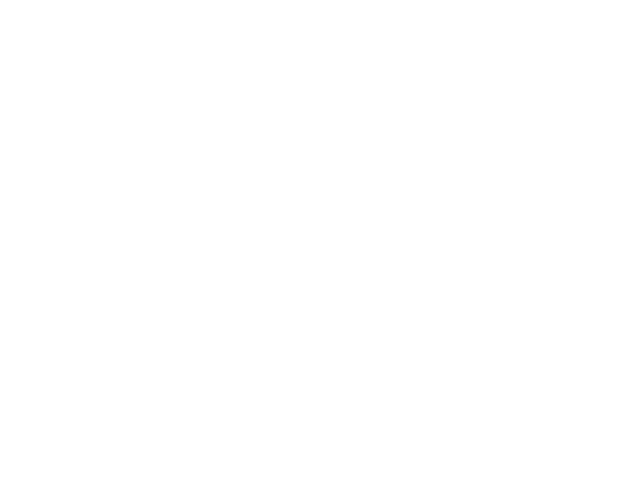

Text(0.5, 1.0, 'ISGRI light curve of MAXI J1820+070')

In [22]:
#We plot the light curve
import numpy as np
plt.figure()
t = lc_maxi.data_unit[1].data['TIME']
dt = lc_maxi.data_unit[1].data['XAX_E']
r = lc_maxi.data_unit[1].data['RATE']
dr = lc_maxi.data_unit[1].data['ERROR']

ind =  (r != 0) & (dr != 0)
t = t[ind]
r = r[ind]
dt = dt[ind]
dr = dr[ind]

title = '%s light curve of %s' %(lc_maxi.data_unit[1].header['DETNAM'], lc_maxi.data_unit[1].header['NAME'])
xlabel = 'Time [IJD = MJD - 51544]'
ylabel = 'Rate [%d-%d keV]' % (lc_maxi.data_unit[1].header['E_MIN'], lc_maxi.data_unit[1].header['E_MAX'])
plt.errorbar(t,r, xerr=dt, yerr=dr, marker='o', color='black', ecolor='black')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)